# Lending Club loan data

## Library Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Load

In [2]:
df_2015 = pd.read_csv('data/LendingClub_loandata/2015.csv',
                      low_memory=False,
                      #  chunksize=1000000,
                      )

In [3]:
df_2015.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 153 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    Unnamed: 0                                  421095 non-null  int64  
 1    id                                          421095 non-null  int64  
 2    member_id                                   0 non-null       float64
 3    loan_amnt                                   421095 non-null  float64
 4    funded_amnt                                 421095 non-null  float64
 5    funded_amnt_inv                             421095 non-null  float64
 6    term                                        421095 non-null  object 
 7    int_rate                                    421095 non-null  float64
 8    installment                                 421095 non-null  float64
 9    grade                                       421095 non-nu

## Data Preprocessing

### Drop Columns: First

In [4]:
drop_cols = ['Unnamed: 0', 'id', 'member_id', 'issue_d', 'emp_title', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'year',
             'last_credit_pull_d', 'verification_status', 'initial_list_status']

In [5]:
df_2015 = df_2015.drop(drop_cols, axis=1)

In [6]:
df_2015.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'],
      

In [7]:
df_2015.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,...,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421093.000000,421095.000000,421095.000000,4.210950e+05,...,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,15240.285862,15240.285862,15234.156426,12.599315,441.842344,7.696561e+04,19.148367,0.347397,0.572690,1.768548e+04,...,5.809238,11.894537,0.004042,0.094318,2.170947,0.133188,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,8571.325901,8571.325901,8567.935757,4.318782,244.847058,7.394996e+04,8.885104,0.927695,0.867776,2.419503e+04,...,3.346698,5.615119,0.067965,0.522758,1.853858,0.385975,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,1000.000000,1000.000000,900.000000,5.320000,14.010000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,8500.000000,8500.000000,8500.000000,9.170000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,6.480000e+03,...,3.000000,8.000000,0.000000,0.000000,1.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,14000.000000,14000.000000,14000.000000,12.290000,385.410000,6.500000e+04,18.600000,0.000000,0.000000,1.199600e+04,...,5.000000,11.000000,0.000000,0.000000,2.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,20000.000000,20000.000000,20000.000000,15.590000,578.790000,9.169050e+04,25.340000,0.000000,1.000000,2.142800e+04,...,7.000000,15.000000,0.000000,0.000000,3.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,999.000000,39.000000,6.000000,2.904836e+06,...,45.000000,90.000000,4.000000,39.000000,30.000000,11.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06


In [8]:
df_2015.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,loan_status
count,421095,421095,421095,397278,421095,421095
unique,2,7,35,11,4,7
top,36 months,C,C1,10+ years,MORTGAGE,Fully Paid
freq,283173,120567,26434,141521,207683,299742


### EDA

- loan_status와의 관계 확인

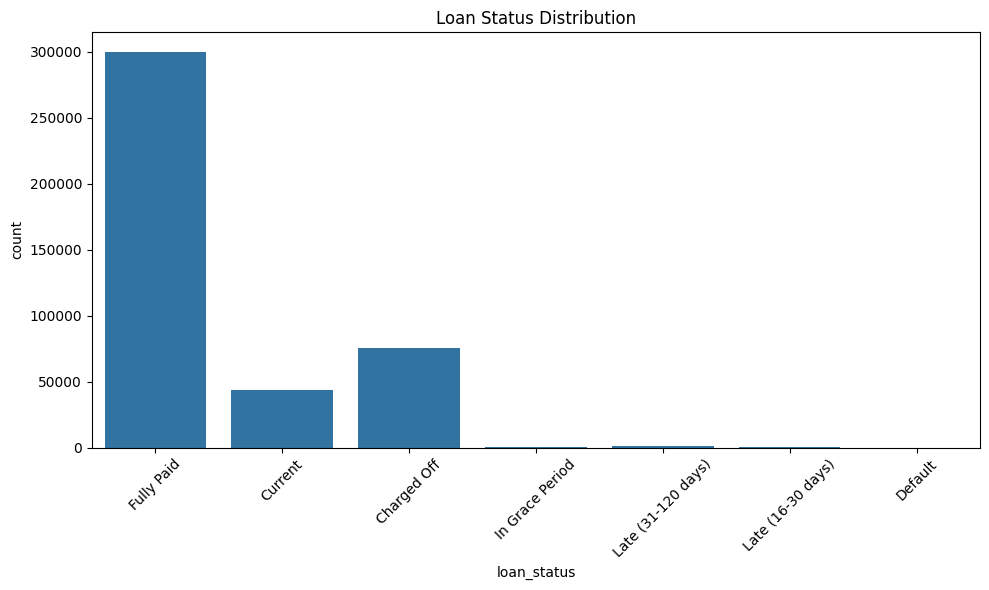

In [9]:
plt.figure(figsize=(10, 6))

sns.countplot(x='loan_status', data=df_2015)

plt.title('Loan Status Distribution')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
df_2015['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid            0.711816
Charged Off           0.180014
Current               0.102825
Late (31-120 days)    0.003227
In Grace Period       0.001453
Late (16-30 days)     0.000663
Default               0.000002
Name: proportion, dtype: float64

### Categories to Numeric

- `sub_grade` 컬럼, 수치형 변환

In [11]:
df_2015['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'C5', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2',
       'E2', 'A4', 'E3', 'A1', 'D4', 'F3', 'D1', 'B3', 'E4', 'D3', 'D2',
       'D5', 'A5', 'F2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [12]:
grade_list = sorted(df_2015['sub_grade'].unique().tolist())
score_list = [x for x in range(len(grade_list), 0, -1)]

grade_map = dict(zip(grade_list, score_list))

df_2015['sub_grade_score'] = df_2015['sub_grade'].map(grade_map)

In [13]:
df_2015 = df_2015.drop('sub_grade', axis=1)

- `emp_length` 컬럼, 수치형으로 변환

In [14]:
## nan 확인

df_2015['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [15]:
## emp_length의 nan 데이터 제외

df_2015 = df_2015[ df_2015['emp_length'].notna() ]

In [16]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10
                  }

df_2015['emp_length_score'] = df_2015['emp_length'].map(emp_length_map)

In [17]:
df_2015 = df_2015.drop('emp_length', axis=1)

### NaN rows drop

In [18]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397278 entries, 0 to 421094
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   397278 non-null  float64
 1   funded_amnt                 397278 non-null  float64
 2   funded_amnt_inv             397278 non-null  float64
 3   term                        397278 non-null  object 
 4   int_rate                    397278 non-null  float64
 5   installment                 397278 non-null  float64
 6   grade                       397278 non-null  object 
 7   home_ownership              397278 non-null  object 
 8   annual_inc                  397278 non-null  float64
 9   loan_status                 397278 non-null  object 
 10  dti                         397278 non-null  float64
 11  delinq_2yrs                 397278 non-null  float64
 12  inq_last_6mths              397278 non-null  float64
 13  revol_bal          

In [19]:
df_2015 = df_2015.dropna()

In [20]:
df_2015.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sub_grade_score,emp_length_score
count,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,3.971180e+05,397118.000000,397118.000000,397118.000000,3.971180e+05,...,397118.000000,397118.000000,397118.000000,397118.000000,3.971180e+05,3.971180e+05,397118.000000,3.971180e+05,397118.000000,397118.000000
mean,15436.338066,15436.338066,15430.184228,12.594169,446.618299,7.853080e+04,19.066188,0.351654,0.572482,1.788782e+04,...,0.004102,0.094619,2.176834,0.128637,1.763546e+05,5.343693e+04,22141.385732,4.467562e+04,24.163407,6.025816
std,8586.642490,8586.642490,8583.246314,4.324100,245.406214,7.526589e+04,8.651480,0.933138,0.867913,2.440821e+04,...,0.068370,0.524809,1.856976,0.380540,1.764486e+05,4.960270e+04,21819.207020,4.436795e+04,6.458167,3.709447
min,1000.000000,1000.000000,925.000000,5.320000,14.010000,3.800000e+03,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000
25%,9000.000000,9000.000000,9000.000000,9.170000,267.790000,4.800000e+04,12.550000,0.000000,0.000000,6.581000e+03,...,0.000000,0.000000,1.000000,0.000000,5.244700e+04,2.348200e+04,8000.000000,1.656500e+04,20.000000,3.000000
50%,14050.000000,14050.000000,14025.000000,12.290000,390.830000,6.600000e+04,18.510000,0.000000,0.000000,1.215200e+04,...,0.000000,0.000000,2.000000,0.000000,1.144560e+05,4.065200e+04,15400.000000,3.406100e+04,25.000000,6.000000
75%,20225.000000,20225.000000,20225.000000,15.590000,586.200000,9.400000e+04,25.210000,0.000000,1.000000,2.166800e+04,...,0.000000,0.000000,3.000000,0.000000,2.536325e+05,6.706500e+04,28900.000000,5.967900e+04,29.000000,10.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,380.530000,39.000000,6.000000,2.904836e+06,...,4.000000,39.000000,30.000000,11.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06,35.000000,10.000000


In [21]:
df_2015.describe(include='object')

,term,grade,home_ownership,loan_status
count,397118,397118,397118,397118
unique,2,7,4,7
top,36 months,C,MORTGAGE,Fully Paid
freq,264079,113664,196744,283102


### One-hot encoding

In [22]:
onehot_cols = ['term', 'grade', 'home_ownership']

In [23]:
df_2015 = pd.get_dummies(df_2015, columns=onehot_cols, drop_first=True, dtype=int)

### Target setting

In [24]:
df_2015['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [31]:
df_2015 = df_2015.loc[ df_2015['loan_status']!='In Grace Period' , ]

In [32]:
status_map = {'Fully Paid': 0,
              'Current': 0,
              'Charged Off': 1,
            #   'In Grace Period': 1,
              'Late (31-120 days)': 1,
              'Late (16-30 days)': 1,
              'Default': 1,
              }

df_2015['loan_status'] = df_2015['loan_status'].map(status_map)

/tmp/ipykernel_11058/534656818.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['loan_status'] = df_2015['loan_status'].map(status_map)


### Index resetting

In [33]:
df_2015 = df_2015.reset_index(drop=True)

## Dataset Split

In [34]:
df_2015['loan_status'].value_counts()

loan_status
0    324719
1     71804
Name: count, dtype: int64

In [35]:
df_2015['loan_status'].value_counts(normalize=True)

loan_status
0    0.818916
1    0.181084
Name: proportion, dtype: float64

In [36]:
y = df_2015['loan_status']
x = df_2015.drop('loan_status', axis=1)

In [37]:
x.shape, y.shape

((396523, 59), (396523,))

In [38]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [52]:
y_train.value_counts(normalize=True)

loan_status
0    0.818916
1    0.181084
Name: proportion, dtype: float64

In [53]:
# y_val.value_counts(normalize=True)

## Data Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [55]:
mm_scaler = MinMaxScaler()

In [56]:
x_train_mm = mm_scaler.fit_transform(x_train)
# x_val_mm = mm_scaler.transform(x_val)
x_test_mm = mm_scaler.transform(x_test)

In [57]:
pd.DataFrame(x_train_mm).describe()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
count,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,...,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000,317218.000000
mean,0.424424,0.424424,0.425510,0.307093,0.301789,0.007877,0.050097,0.009005,0.095316,0.010962,...,0.334369,0.279398,0.285867,0.147391,0.083457,0.023388,0.005085,0.496116,0.102623,0.401254
std,0.252384,0.252384,0.251729,0.182681,0.171402,0.008221,0.022762,0.023867,0.144630,0.014652,...,0.471770,0.448704,0.451827,0.354496,0.276572,0.151132,0.071127,0.499986,0.303467,0.490153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.235294,0.236977,0.162653,0.176852,0.004654,0.032980,0.000000,0.000000,0.004044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.383088,0.383088,0.384446,0.294466,0.262751,0.006550,0.048616,0.000000,0.000000,0.007455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565441,0.565441,0.566398,0.433883,0.399409,0.009499,0.066223,0.000000,0.166667,0.013281,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# pd.DataFrame(x_val_mm).describe()

## Modeling

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()

In [67]:
model_lr.fit(x_train_mm, y_train)
model_rfc.fit(x_train_mm, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
y_pred_lr = model_lr.predict(x_test_mm)
y_pred_rfc = model_rfc.predict(x_test_mm)

## Metrics

In [69]:
from sklearn.metrics import classification_report

In [70]:
print('Logistic Regression Results')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
---------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64944
           1       1.00      0.94      0.97     14361

    accuracy                           0.99     79305
   macro avg       0.99      0.97      0.98     79305
weighted avg       0.99      0.99      0.99     79305



In [71]:
print('Random Forest Results')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc))

Random Forest Results
---------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64944
           1       1.00      0.96      0.98     14361

    accuracy                           0.99     79305
   macro avg       0.99      0.98      0.99     79305
weighted avg       0.99      0.99      0.99     79305



## Etc...

- 2015년 주별 GDP(?)와 2015년 주별 대출 비율의 상관관계?

In [ ]:
df_2015.describe()

In [ ]:
df_2015['pymnt_plan'].value_counts()

In [ ]:
df_2015['term'].unique()

In [ ]:
len(df_2015['sub_grade'].unique())

In [ ]:
df_2015['sub_grade'].value_counts()